In [1]:
import pandas as pd
heart_attack_data = pd.read_csv(r'C:\Users\AAYUSH\Desktop\Dataset\Health care India\Full body checkup\heart_attack_2.csv')
heart_attack_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
heart_attack_data.shape

(918, 12)

In [3]:
heart_attack_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
heart_attack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_attack_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# removing pateints(rows) without diabets
heart_attack_data.drop(heart_attack_data[heart_attack_data['HeartDisease'] == 0].index, inplace = True)

#selecting columns for subset
subset = heart_attack_data[["Age","Cholesterol","MaxHR"]]
subset = subset.dropna()
subset.head()

,Age,Cholesterol,MaxHR
1,49,180,156
3,48,214,108
8,37,207,130
11,58,164,99
13,49,234,140


In [7]:
subset.describe()

,Age,Cholesterol,MaxHR
count,508.000000,508.000000,508.000000
mean,55.899606,175.940945,127.655512
std,8.727056,126.391398,23.386923
min,31.000000,0.000000,60.000000
25%,51.000000,0.000000,112.000000
50%,57.000000,217.000000,126.000000
75%,62.000000,267.000000,144.250000
max,77.000000,603.000000,195.000000


In [8]:
import matplotlib.pyplot as plt

C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_3176\3207795196.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  graph = plt.figure(figsize=(10,10)).gca(projection='3d')


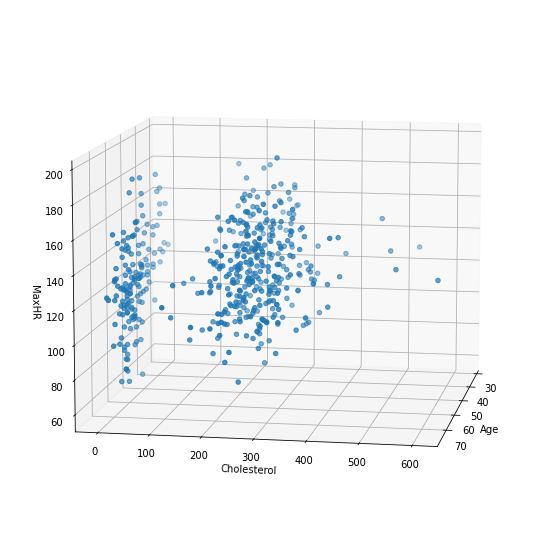

In [9]:
graph = plt.figure(figsize=(10,10)).gca(projection='3d')
col1, col2, col3 = 'Age', 'Cholesterol', 'MaxHR'

graph.scatter(subset[col1], subset[col2], subset[col3])
graph.set_xlabel(col1)
graph.set_ylabel(col2)
graph.set_zlabel(col3)
graph.view_init(10, 10)
plt.show()

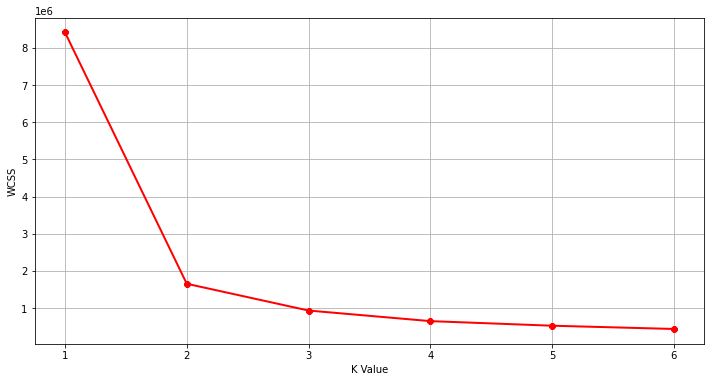

In [10]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

wcss = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(subset)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,7),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,7,1))
plt.ylabel("WCSS")
plt.show()

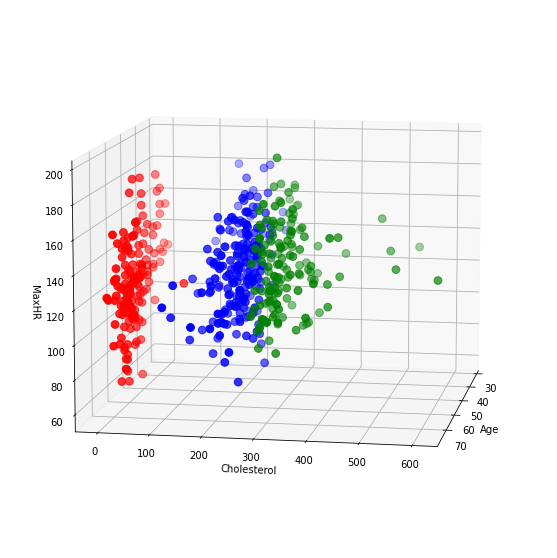

In [11]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=3)
clusters = km.fit_predict(subset)
subset["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset[col1][subset.label == 0], subset[col2][subset.label == 0], subset[col3][subset.label == 0], c='blue', s=60)
ax.scatter(subset[col1][subset.label == 1], subset[col2][subset.label == 1], subset[col3][subset.label == 1], c='red', s=60)
ax.scatter(subset[col1][subset.label == 2], subset[col2][subset.label == 2], subset[col3][subset.label == 2], c='green', s=60)

ax.view_init(10, 10)
plt.xlabel(col1)
plt.ylabel(col2)
ax.set_zlabel(col3)
plt.show()